In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/clean_ecomm_data.csv")
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,order_year,order_month,order_week
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017.0,8.0,32.0
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017.0,8.0,32.0
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017.0,12.0,49.0
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016.0,11.0,45.0
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016.0,11.0,45.0


In [2]:
# Group by Month
monthly_sales = df.groupby(pd.Grouper(key="order_date", freq="M"))['sales'].sum()

monthly_sales = monthly_sales.reset_index()
monthly_sales.head()


/var/folders/0y/q4gsj6nx47g23s_w0hy385l00000gn/T/ipykernel_18380/1846940079.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key="order_date", freq="M"))['sales'].sum()


,order_date,sales
0,2015-01-31,19546.163
1,2015-02-28,11678.994
2,2015-03-31,6716.044
3,2015-04-30,12455.482
4,2015-05-31,15165.051


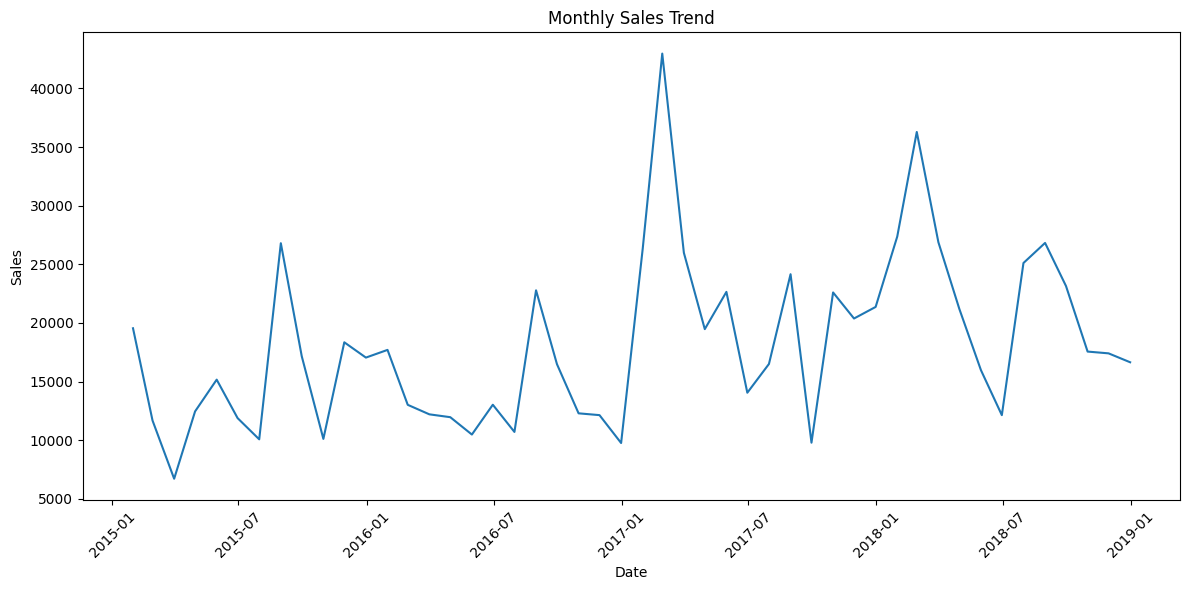

In [3]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()

import os
os.makedirs("../images", exist_ok=True)
plt.savefig("../images/monthly_sales_trend.png")
plt.show()


In [4]:
# Create Moving Average Forecast
monthly_sales['sales_ma_3'] = monthly_sales['sales'].rolling(window=3).mean()
monthly_sales['sales_ma_6'] = monthly_sales['sales'].rolling(window=6).mean()

monthly_sales.tail()


,order_date,sales,sales_ma_3,sales_ma_6
43,2018-08-31,26823.690,21357.441767,21356.340383
44,2018-09-30,23148.870,25027.679833,20733.993217
45,2018-10-31,17558.322,22510.294000,20126.445717
46,2018-11-30,17407.270,19371.487333,20364.464550
47,2018-12-31,16647.042,17204.211333,21115.945583


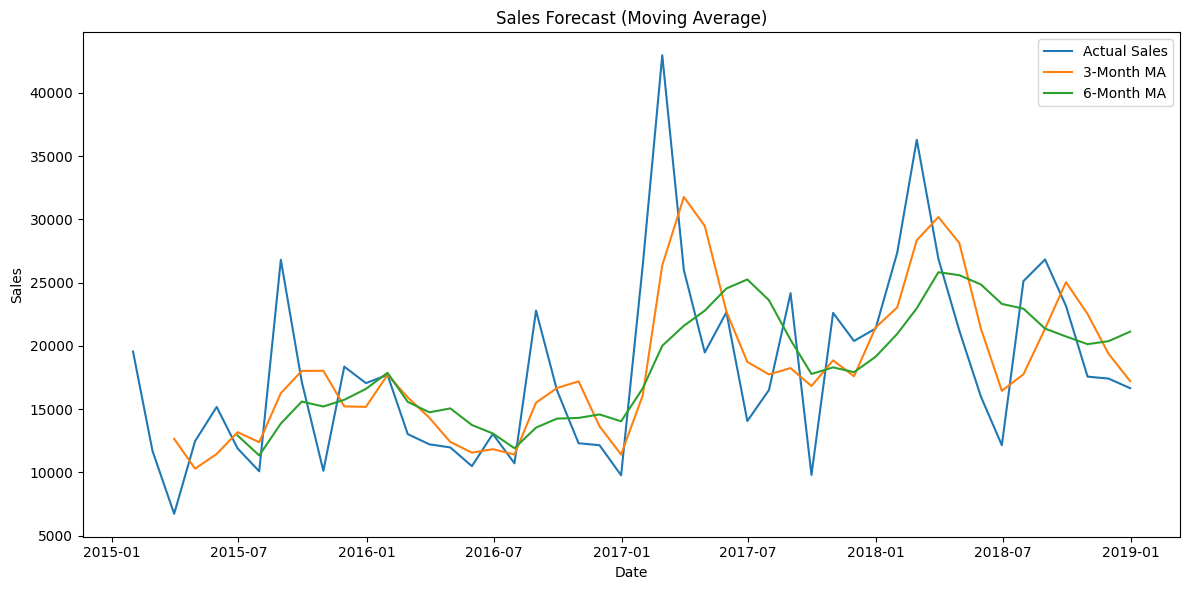

In [5]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["order_date"], monthly_sales["sales"], label="Actual Sales")
plt.plot(monthly_sales["order_date"], monthly_sales["sales_ma_3"], label="3-Month MA")
plt.plot(monthly_sales["order_date"], monthly_sales["sales_ma_6"], label="6-Month MA")

plt.title("Sales Forecast (Moving Average)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()

plt.savefig("../images/sales_forecast_ma.png")
plt.show()


In [6]:
monthly_sales.to_csv("../reports/sales_forecast.csv", index=False)
